# Industrial Human Resource Geo-Visualization

In [6]:
## all csv file convert to data frame

In [8]:
import pandas as pd
import os

folder_path = r'C:\Users\ADMIN\Desktop\hr\hr'  # Update the path to your folder
extension = '.csv'  # Specify the file extension
encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252']  # List of encoding options

dataframes = []
for file in os.listdir(folder_path):
    if file.endswith(extension):
        file_path = os.path.join(folder_path, file)
        for encoding in encodings:
            try:
                df = pd.read_csv(file_path, encoding=encoding)
                dataframes.append(df)
                break  # Break the loop if reading succeeds with a specific encoding
            except UnicodeDecodeError:
                continue  # Continue to the next encoding if decoding error occurs

merged_df = pd.concat(dataframes)


In [9]:
merged_df.columns

Index(['State Code', 'District Code', 'India/States', 'Division', 'Group',
       'Class', 'NIC Name', 'Main Workers - Total -  Persons',
       'Main Workers - Total - Males', 'Main Workers - Total - Females',
       'Main Workers - Rural -  Persons', 'Main Workers - Rural - Males',
       'Main Workers - Rural - Females', 'Main Workers - Urban -  Persons',
       'Main Workers - Urban - Males', 'Main Workers - Urban - Females',
       'Marginal Workers - Total -  Persons',
       'Marginal Workers - Total - Males',
       'Marginal Workers - Total - Females',
       'Marginal Workers - Rural -  Persons',
       'Marginal Workers - Rural - Males',
       'Marginal Workers - Rural - Females',
       'Marginal Workers - Urban -  Persons',
       'Marginal Workers - Urban - Males',
       'Marginal Workers - Urban - Females'],
      dtype='object')

In [10]:
def remove_special_characters(column_name):
    # Replace any non-alphanumeric characters with an empty string
    return ''.join(e for e in column_name if e.isalnum())

# Rename columns using the remove_special_characters function
merged_df.rename(columns=remove_special_characters, inplace=True)

#print(merged_df)


In [11]:
merged_df["StateCode"]

0        `07
1        `07
2        `07
3        `07
4        `07
        ... 
13825    `19
13826    `19
13827    `19
13828    `19
13829    `19
Name: StateCode, Length: 184948, dtype: object

# EDA

In [12]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# Identify columns with non-numeric data
non_numeric_columns =merged_df.select_dtypes(exclude=[float, int]).columns

# Drop non-numeric columns from the DataFrame
numeric_df = merged_df.drop(columns=non_numeric_columns)

# Calculate correlation
correlation_matrix = numeric_df.corr()
correlation_matrix


,MainWorkersTotalPersons,MainWorkersTotalMales,MainWorkersTotalFemales,MainWorkersRuralPersons,MainWorkersRuralMales,MainWorkersRuralFemales,MainWorkersUrbanPersons,MainWorkersUrbanMales,MainWorkersUrbanFemales,MarginalWorkersTotalPersons,MarginalWorkersTotalMales,MarginalWorkersTotalFemales,MarginalWorkersRuralPersons,MarginalWorkersRuralMales,MarginalWorkersRuralFemales,MarginalWorkersUrbanPersons,MarginalWorkersUrbanMales,MarginalWorkersUrbanFemales
MainWorkersTotalPersons,1.000000,0.996935,0.938958,0.982752,0.981072,0.895109,0.989262,0.987097,0.926005,0.931419,0.962668,0.858481,0.904806,0.942661,0.829550,0.914339,0.954723,0.819444
MainWorkersTotalMales,0.996935,1.000000,0.909166,0.978083,0.983619,0.863222,0.987538,0.990489,0.899942,0.917982,0.960677,0.835236,0.891679,0.941249,0.807901,0.901306,0.951810,0.795116
MainWorkersTotalFemales,0.938958,0.909166,1.000000,0.930045,0.896761,0.968630,0.923120,0.898619,0.971609,0.921099,0.899688,0.896728,0.895105,0.878625,0.862934,0.903515,0.896390,0.865362
MainWorkersRuralPersons,0.982752,0.978083,0.930045,1.000000,0.994983,0.923500,0.945170,0.943653,0.882095,0.944651,0.967585,0.878674,0.937504,0.968215,0.866201,0.884824,0.923397,0.793592
MainWorkersRuralMales,0.981072,0.983619,0.896761,0.994983,1.000000,0.880491,0.946168,0.949462,0.860009,0.928641,0.968175,0.848273,0.919388,0.968523,0.834554,0.874599,0.924453,0.770553
MainWorkersRuralFemales,0.895109,0.863222,0.968630,0.923500,0.880491,1.000000,0.850856,0.831037,0.882336,0.915602,0.872689,0.911123,0.917215,0.874340,0.904623,0.839321,0.830945,0.805957
MainWorkersUrbanPersons,0.989262,0.987538,0.923120,0.945170,0.946168,0.850856,1.000000,0.997376,0.938141,0.898262,0.935323,0.821601,0.856914,0.899492,0.780367,0.915383,0.956214,0.819906
MainWorkersUrbanMales,0.987097,0.990489,0.898619,0.943653,0.949462,0.831037,0.997376,1.000000,0.910611,0.889637,0.933806,0.806898,0.850901,0.899710,0.769773,0.901850,0.951737,0.796361
MainWorkersUrbanFemales,0.926005,0.899942,0.971609,0.882095,0.860009,0.882336,0.938141,0.910611,1.000000,0.872672,0.872979,0.830782,0.821908,0.831518,0.772971,0.911995,0.906476,0.871506
MarginalWorkersTotalPersons,0.931419,0.917982,0.921099,0.944651,0.928641,0.915602,0.898262,0.889637,0.872672,1.000000,0.972667,0.977273,0.988357,0.967640,0.954810,0.945400,0.938128,0.905262


In [ ]:
## shape of file 

In [13]:
print(merged_df.shape)

(184948, 25)


In [ ]:
## head of data set

In [14]:
merged_df.head()

,StateCode,DistrictCode,IndiaStates,Division,Group,Class,NICName,MainWorkersTotalPersons,MainWorkersTotalMales,MainWorkersTotalFemales,...,MainWorkersUrbanFemales,MarginalWorkersTotalPersons,MarginalWorkersTotalMales,MarginalWorkersTotalFemales,MarginalWorkersRuralPersons,MarginalWorkersRuralMales,MarginalWorkersRuralFemales,MarginalWorkersUrbanPersons,MarginalWorkersUrbanMales,MarginalWorkersUrbanFemales
0,`07,`000,STATE - NCT OF DELHI,`00,`000,`0000,Total,828980,708129,120851,...,117709,61009,44743,16266,1969,1494,475,59040,43249,15791
1,`07,`000,STATE - NCT OF DELHI,`01,`000,`0000,"Crop and animal production, hunting and relate...",1484,1271,213,...,162,224,150,74,23,13,10,201,137,64
2,`07,`000,STATE - NCT OF DELHI,`01,`011,`0000,Growing of non-perennial crops,169,151,18,...,16,92,65,27,14,12,2,78,53,25
3,`07,`000,STATE - NCT OF DELHI,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",83,81,2,...,0,37,27,10,8,6,2,29,21,8
4,`07,`000,STATE - NCT OF DELHI,`01,`011,`0112,Growing of rice,9,9,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
##describe

In [15]:
merged_df.describe()

,MainWorkersTotalPersons,MainWorkersTotalMales,MainWorkersTotalFemales,MainWorkersRuralPersons,MainWorkersRuralMales,MainWorkersRuralFemales,MainWorkersUrbanPersons,MainWorkersUrbanMales,MainWorkersUrbanFemales,MarginalWorkersTotalPersons,MarginalWorkersTotalMales,MarginalWorkersTotalFemales,MarginalWorkersRuralPersons,MarginalWorkersRuralMales,MarginalWorkersRuralFemales,MarginalWorkersUrbanPersons,MarginalWorkersUrbanMales,MarginalWorkersUrbanFemales
count,1.849480e+05,1.849480e+05,1.849480e+05,1.849480e+05,1.849480e+05,1.849480e+05,1.849480e+05,1.849480e+05,1.849480e+05,1.849480e+05,1.849480e+05,1.849480e+05,1.849480e+05,1.849480e+05,1.849480e+05,1.849480e+05,184948.000000,184948.000000
mean,1.571351e+03,1.256590e+03,3.147614e+02,6.948432e+02,5.438936e+02,1.509495e+02,8.765078e+02,7.126959e+02,1.638118e+02,3.820667e+02,1.913004e+02,1.907663e+02,2.620754e+02,1.217758e+02,1.402997e+02,1.199912e+02,69.524623,50.466596
std,4.692249e+04,3.876434e+04,8.815049e+03,2.099945e+04,1.699218e+04,4.431529e+03,2.657058e+04,2.226224e+04,4.654687e+03,1.208833e+04,5.916449e+03,6.480887e+03,8.455030e+03,3.823506e+03,4.877211e+03,3.947262e+03,2190.486095,1852.266490
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,6.000000e+00,6.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.200000e+01,2.600000e+01,3.000000e+00,1.200000e+01,1.000000e+01,0.000000e+00,1.300000e+01,1.200000e+01,1.000000e+00,5.000000e+00,3.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
75%,2.080000e+02,1.600000e+02,2.600000e+01,8.000000e+01,6.200000e+01,1.000000e+01,9.600000e+01,7.600000e+01,1.200000e+01,3.000000e+01,1.900000e+01,7.000000e+00,1.500000e+01,1.000000e+01,3.000000e+00,1.000000e+01,6.000000,2.000000
max,1.561976e+07,1.280140e+07,2.818356e+06,6.770444e+06,5.446541e+06,1.323903e+06,8.849315e+06,7.354862e+06,1.494453e+06,3.834122e+06,1.966750e+06,1.867372e+06,2.515182e+06,1.223824e+06,1.291358e+06,1.318940e+06,742926.000000,576014.000000


In [ ]:
# information about the dataset


In [16]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184948 entries, 0 to 13829
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   StateCode                    184948 non-null  object
 1   DistrictCode                 184948 non-null  object
 2   IndiaStates                  184948 non-null  object
 3   Division                     184948 non-null  object
 4   Group                        184948 non-null  object
 5   Class                        184948 non-null  object
 6   NICName                      184948 non-null  object
 7   MainWorkersTotalPersons      184948 non-null  int64 
 8   MainWorkersTotalMales        184948 non-null  int64 
 9   MainWorkersTotalFemales      184948 non-null  int64 
 10  MainWorkersRuralPersons      184948 non-null  int64 
 11  MainWorkersRuralMales        184948 non-null  int64 
 12  MainWorkersRuralFemales      184948 non-null  int64 
 13  MainWorkersUrbanPers

In [17]:
merged_df.nunique()

StateCode                        22
DistrictCode                    401
IndiaStates                     421
Division                         89
Group                           241
Class                           423
NICName                         587
MainWorkersTotalPersons        8668
MainWorkersTotalMales          7802
MainWorkersTotalFemales        3963
MainWorkersRuralPersons        5755
MainWorkersRuralMales          5208
MainWorkersRuralFemales        2688
MainWorkersUrbanPersons        6559
MainWorkersUrbanMales          5933
MainWorkersUrbanFemales        2928
MarginalWorkersTotalPersons    4188
MarginalWorkersTotalMales      3163
MarginalWorkersTotalFemales    2837
MarginalWorkersRuralPersons    3384
MarginalWorkersRuralMales      2517
MarginalWorkersRuralFemales    2368
MarginalWorkersUrbanPersons    2417
MarginalWorkersUrbanMales      1947
MarginalWorkersUrbanFemales    1553
dtype: int64

In [ ]:
##Handling Missing Values

In [18]:
merged_df.isnull().sum()

StateCode                      0
DistrictCode                   0
IndiaStates                    0
Division                       0
Group                          0
Class                          0
NICName                        0
MainWorkersTotalPersons        0
MainWorkersTotalMales          0
MainWorkersTotalFemales        0
MainWorkersRuralPersons        0
MainWorkersRuralMales          0
MainWorkersRuralFemales        0
MainWorkersUrbanPersons        0
MainWorkersUrbanMales          0
MainWorkersUrbanFemales        0
MarginalWorkersTotalPersons    0
MarginalWorkersTotalMales      0
MarginalWorkersTotalFemales    0
MarginalWorkersRuralPersons    0
MarginalWorkersRuralMales      0
MarginalWorkersRuralFemales    0
MarginalWorkersUrbanPersons    0
MarginalWorkersUrbanMales      0
MarginalWorkersUrbanFemales    0
dtype: int64

In [ ]:
##Data visualization

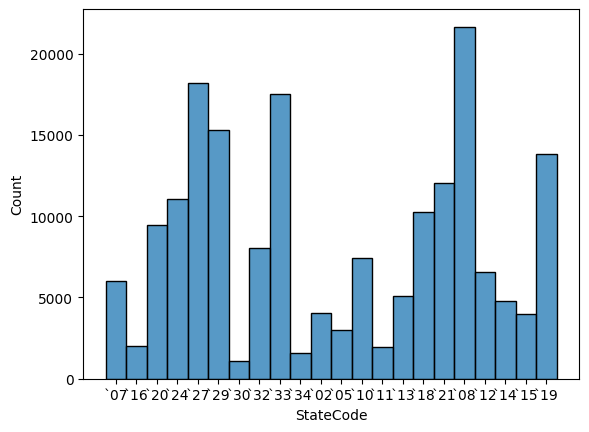

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt   
sns.histplot(x='StateCode', data=merged_df, )
plt.show()

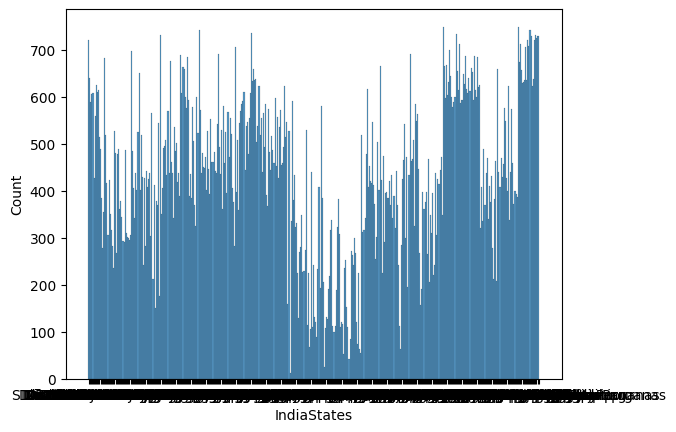

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(x="IndiaStates", data=merged_df)
plt.show()


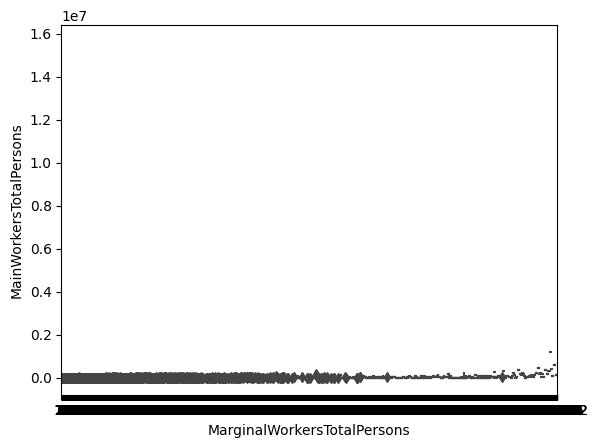

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
x_var = "MarginalWorkersTotalPersons"
y_var = "MainWorkersTotalPersons"
sns.boxplot(x=x_var, y=y_var, data=merged_df)
plt.show()


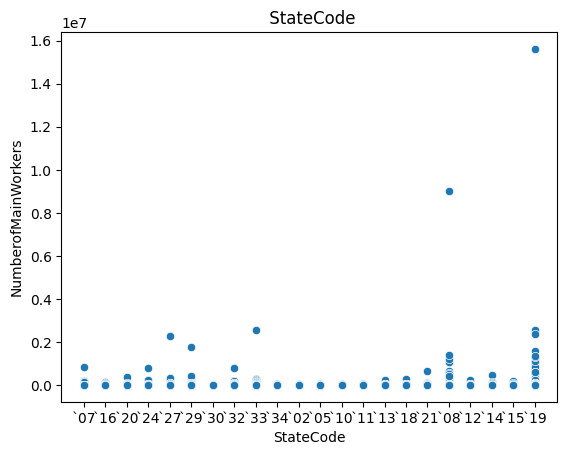

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
y_var = "MainWorkersTotalPersons".strip()
sns.scatterplot(x='StateCode', y=y_var, data=merged_df)
plt.xlabel('StateCode')
plt.ylabel('NumberofMainWorkers')
plt.title(' StateCode')
plt.show()


C:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


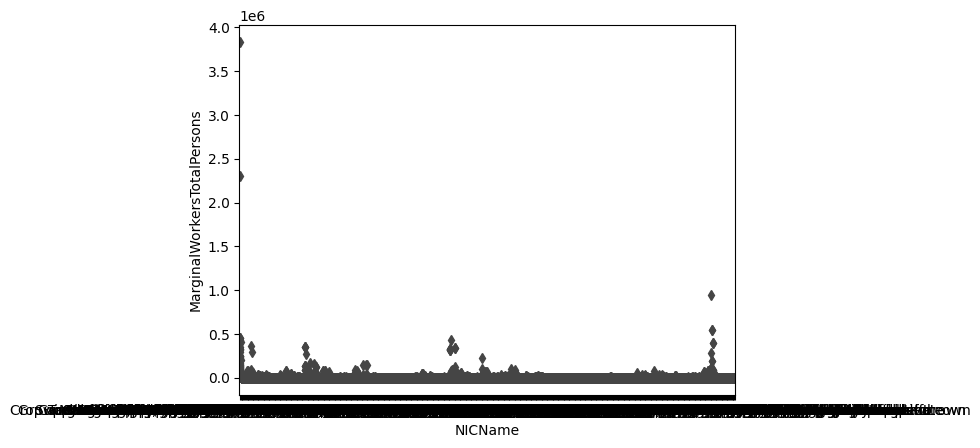

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.boxplot( x="NICName", y='MarginalWorkersTotalPersons', data=merged_df)
plt.show()

# data cleaning

In [19]:
merged_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
13825    False
13826    False
13827    False
13828    False
13829    False
Length: 184948, dtype: bool

In [20]:
merged_df.dtypes

StateCode                      object
DistrictCode                   object
IndiaStates                    object
Division                       object
Group                          object
Class                          object
NICName                        object
MainWorkersTotalPersons         int64
MainWorkersTotalMales           int64
MainWorkersTotalFemales         int64
MainWorkersRuralPersons         int64
MainWorkersRuralMales           int64
MainWorkersRuralFemales         int64
MainWorkersUrbanPersons         int64
MainWorkersUrbanMales           int64
MainWorkersUrbanFemales         int64
MarginalWorkersTotalPersons     int64
MarginalWorkersTotalMales       int64
MarginalWorkersTotalFemales     int64
MarginalWorkersRuralPersons     int64
MarginalWorkersRuralMales       int64
MarginalWorkersRuralFemales     int64
MarginalWorkersUrbanPersons     int64
MarginalWorkersUrbanMales       int64
MarginalWorkersUrbanFemales     int64
dtype: object

In [21]:
merged_df.columns

Index(['StateCode', 'DistrictCode', 'IndiaStates', 'Division', 'Group',
       'Class', 'NICName', 'MainWorkersTotalPersons', 'MainWorkersTotalMales',
       'MainWorkersTotalFemales', 'MainWorkersRuralPersons',
       'MainWorkersRuralMales', 'MainWorkersRuralFemales',
       'MainWorkersUrbanPersons', 'MainWorkersUrbanMales',
       'MainWorkersUrbanFemales', 'MarginalWorkersTotalPersons',
       'MarginalWorkersTotalMales', 'MarginalWorkersTotalFemales',
       'MarginalWorkersRuralPersons', 'MarginalWorkersRuralMales',
       'MarginalWorkersRuralFemales', 'MarginalWorkersUrbanPersons',
       'MarginalWorkersUrbanMales', 'MarginalWorkersUrbanFemales'],
      dtype='object')

In [ ]:
## removing columns

In [22]:
import pandas as pd

# Assuming you have a DataFrame named 'merged_df'
columns_to_drop = ["StateCode", "DistrictCode", "Division", "Group", "Class"]
merged_df = merged_df.drop(columns=columns_to_drop)


In [23]:
merged_df.columns

Index(['IndiaStates', 'NICName', 'MainWorkersTotalPersons',
       'MainWorkersTotalMales', 'MainWorkersTotalFemales',
       'MainWorkersRuralPersons', 'MainWorkersRuralMales',
       'MainWorkersRuralFemales', 'MainWorkersUrbanPersons',
       'MainWorkersUrbanMales', 'MainWorkersUrbanFemales',
       'MarginalWorkersTotalPersons', 'MarginalWorkersTotalMales',
       'MarginalWorkersTotalFemales', 'MarginalWorkersRuralPersons',
       'MarginalWorkersRuralMales', 'MarginalWorkersRuralFemales',
       'MarginalWorkersUrbanPersons', 'MarginalWorkersUrbanMales',
       'MarginalWorkersUrbanFemales'],
      dtype='object')

# Feature Engineering

In [24]:
# Example: Creating a new 'TotalWorkers' column by summing 'MainWorkersTotalPersons' and 'MarginalWorkersTotalPersons'
merged_df['TotalWorkers'] = merged_df['MainWorkersTotalPersons'] + merged_df['MarginalWorkersTotalPersons']

merged_df['MaleFemaleRatio'] = merged_df['MainWorkersTotalMales'] / (merged_df['MainWorkersTotalFemales'].replace(0, 1))



In [25]:
merged_df[['TotalWorkers', 'MaleFemaleRatio']].isnull().sum()

TotalWorkers       0
MaleFemaleRatio    0
dtype: int64

In [26]:
import pandas as pd

# Replace 'file_path' with the path to your CSV file
file_path = r'C:\Users\ADMIN\Desktop\hr\dist_lat_long.csv'

# Read the CSV file into a Pandas DataFrame
data_frame = pd.read_csv(file_path)

# Now 'data_frame' contains the data from the CSV file
# You can perform various operations on the 

In [27]:
import pandas as pd

# Assuming 'data_frame' and 'merged_df' are the DataFrames with 'Latitude' and 'Longitude' columns
# Make sure both DataFrames have the same number of rows or index labels align properly

# Concatenate the two DataFrames horizontally (along columns) based on their index
merged_df = pd.concat([merged_df, data_frame[['Latitude', 'Longitude']]], axis=1)

# Now 'merged_df' will contain the additional 'Latitude' and 'Longitude' columns
# You can use the merged DataFrame for further analysis or visualization


In [28]:
merged_df.columns

Index(['IndiaStates', 'NICName', 'MainWorkersTotalPersons',
       'MainWorkersTotalMales', 'MainWorkersTotalFemales',
       'MainWorkersRuralPersons', 'MainWorkersRuralMales',
       'MainWorkersRuralFemales', 'MainWorkersUrbanPersons',
       'MainWorkersUrbanMales', 'MainWorkersUrbanFemales',
       'MarginalWorkersTotalPersons', 'MarginalWorkersTotalMales',
       'MarginalWorkersTotalFemales', 'MarginalWorkersRuralPersons',
       'MarginalWorkersRuralMales', 'MarginalWorkersRuralFemales',
       'MarginalWorkersUrbanPersons', 'MarginalWorkersUrbanMales',
       'MarginalWorkersUrbanFemales', 'TotalWorkers', 'MaleFemaleRatio',
       'Latitude', 'Longitude'],
      dtype='object')

In [29]:
merged_df[['Latitude', 'Longitude']].isnull().sum()

Latitude     168844
Longitude    168844
dtype: int64

In [30]:
merged_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
13825     True
13826    False
13827     True
13828    False
13829     True
Length: 184948, dtype: bool

In [31]:
# Calculate the mean of the 'Latitude' and 'Longitude' columns
mean_latitude = merged_df['Latitude'].mean()
mean_longitude = merged_df['Longitude'].mean()

# Fill the missing values with their respective mean values
merged_df['Latitude'].fillna(mean_latitude, inplace=True)
merged_df['Longitude'].fillna(mean_longitude, inplace=True)

In [32]:
merged_df[['Latitude', 'Longitude']].isnull().sum()

Latitude     0
Longitude    0
dtype: int64

# outliers detection

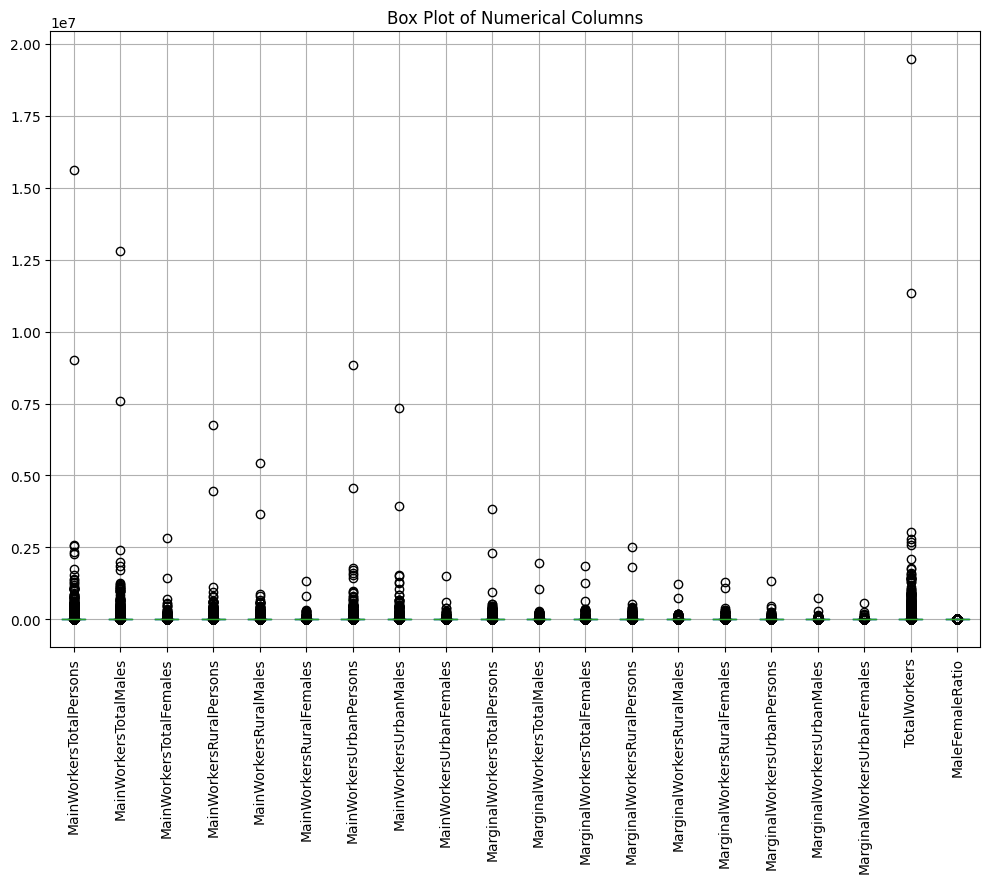

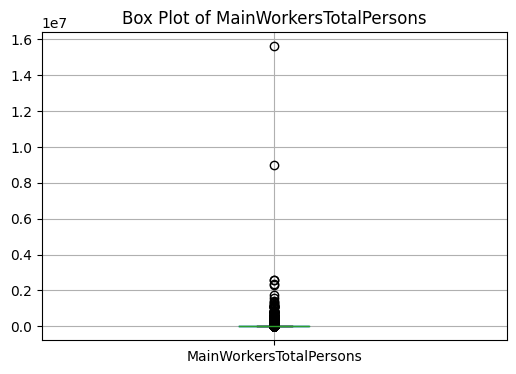

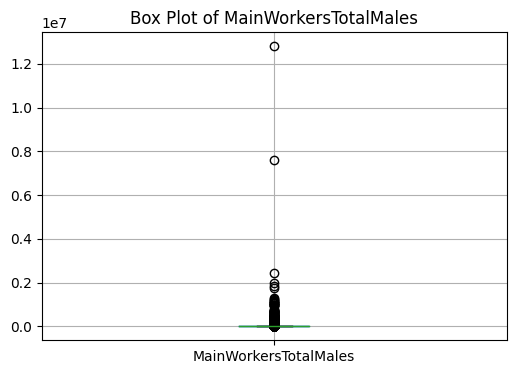

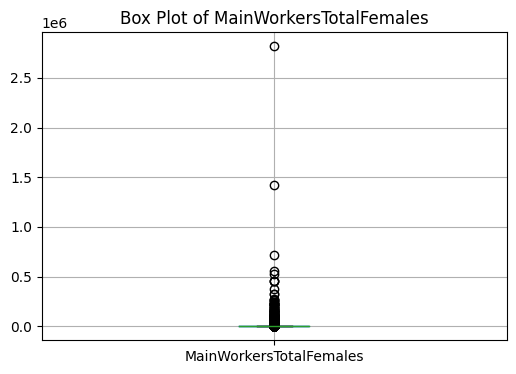

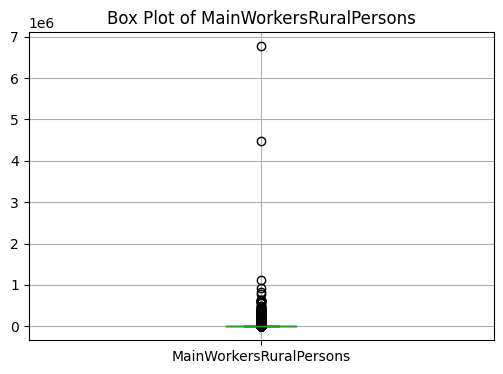

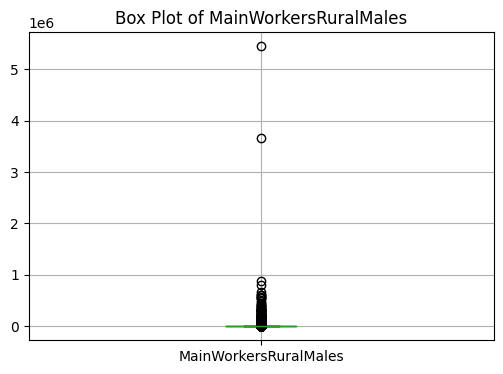

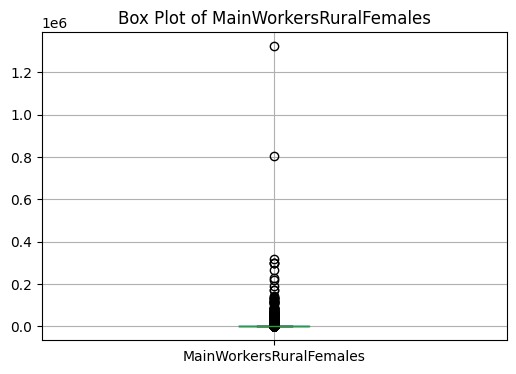

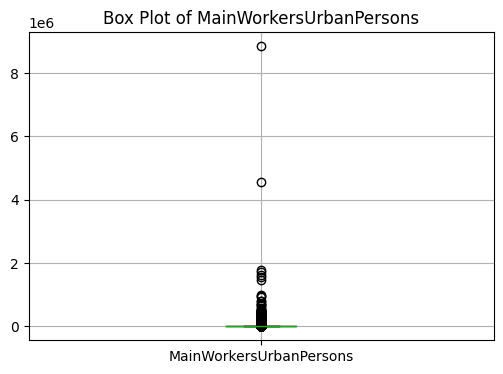

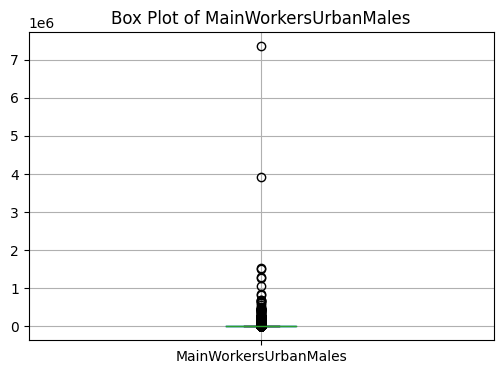

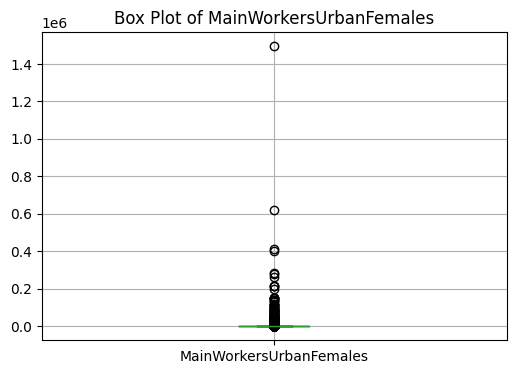

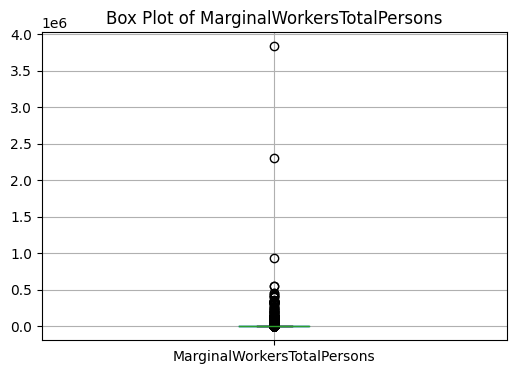

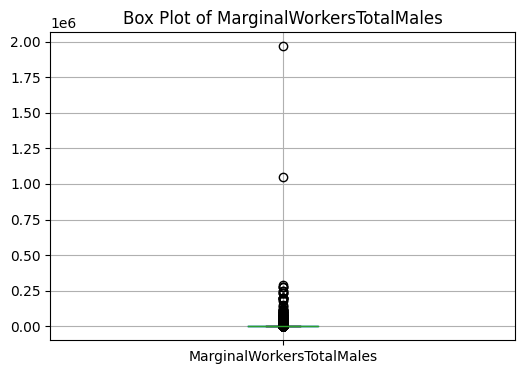

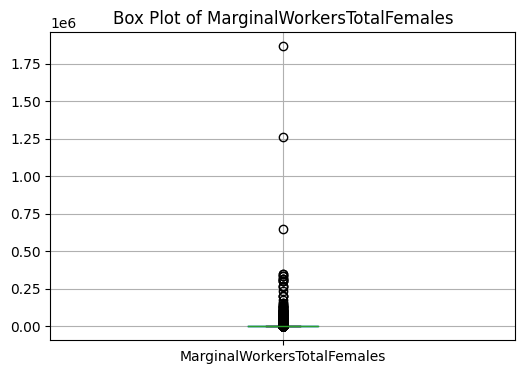

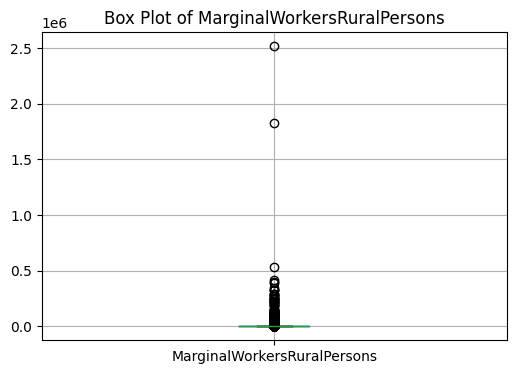

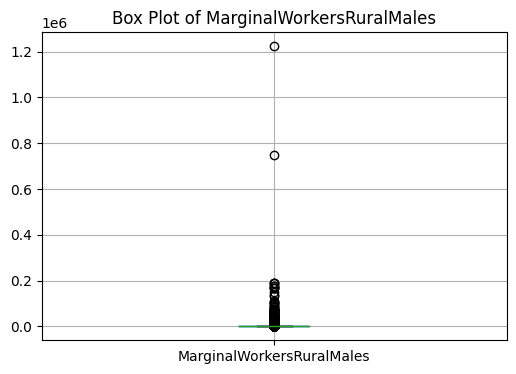

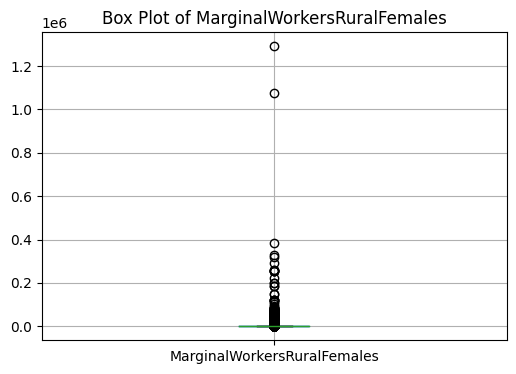

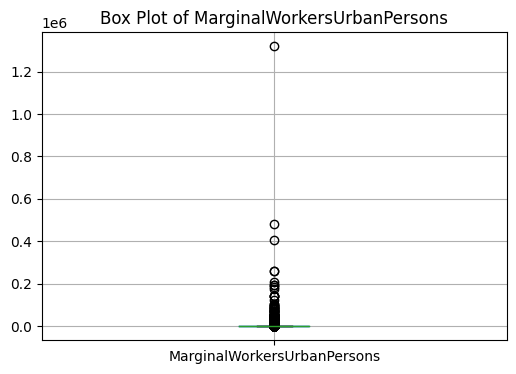

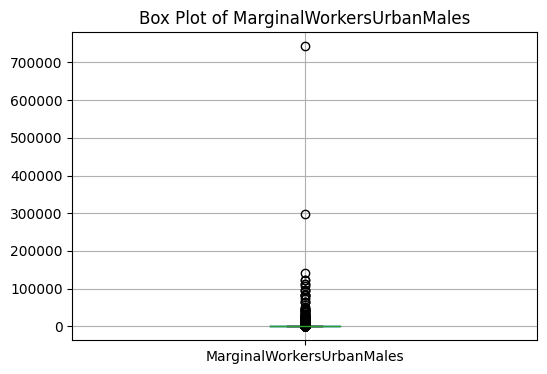

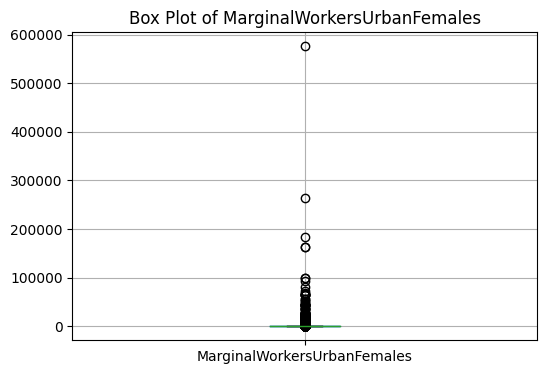

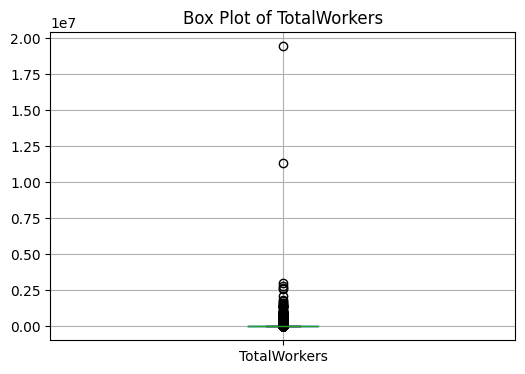

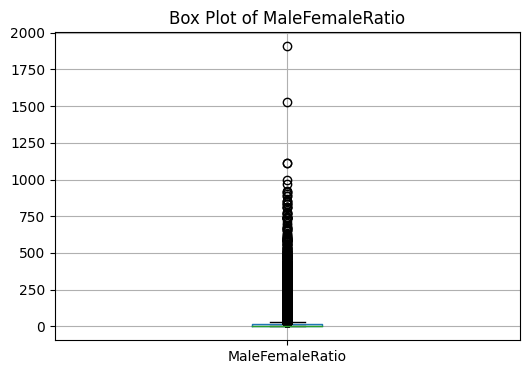

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Select only the numerical columns for outlier detection
numerical_columns = ['MainWorkersTotalPersons', 'MainWorkersTotalMales', 'MainWorkersTotalFemales',
                     'MainWorkersRuralPersons', 'MainWorkersRuralMales', 'MainWorkersRuralFemales',
                     'MainWorkersUrbanPersons', 'MainWorkersUrbanMales', 'MainWorkersUrbanFemales',
                     'MarginalWorkersTotalPersons', 'MarginalWorkersTotalMales', 'MarginalWorkersTotalFemales',
                     'MarginalWorkersRuralPersons', 'MarginalWorkersRuralMales', 'MarginalWorkersRuralFemales',
                     'MarginalWorkersUrbanPersons', 'MarginalWorkersUrbanMales', 'MarginalWorkersUrbanFemales',
                     'TotalWorkers', 'MaleFemaleRatio']

# Calculate outliers using Z-score
z_scores =merged_df[numerical_columns].apply(lambda x: (x - x.mean()) / x.std())

# Set a threshold for Z-score (e.g., 3) to identify outliers
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Plot Box Plots to visualize the distribution and outliers
plt.figure(figsize=(12, 8))
merged_df[numerical_columns].boxplot()
plt.title("Box Plot of Numerical Columns")
plt.xticks(rotation=90)
plt.show()

# Plot Box Plots separately for each numerical column to focus on individual distributions
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    merged_df[[column]].boxplot()
    plt.title(f"Box Plot of {column}")
    plt.show()


In [ ]:
## remove outliers

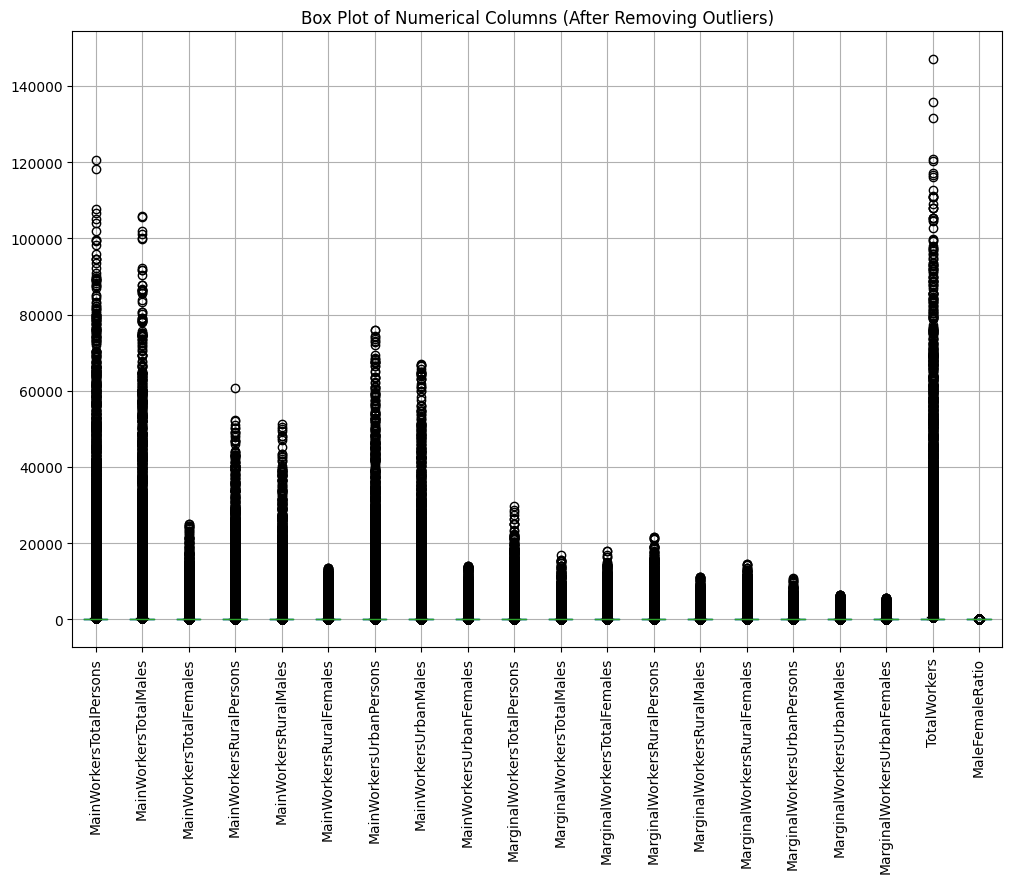

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Select only the numerical columns for outlier detection
numerical_columns = ['MainWorkersTotalPersons', 'MainWorkersTotalMales', 'MainWorkersTotalFemales',
                     'MainWorkersRuralPersons', 'MainWorkersRuralMales', 'MainWorkersRuralFemales',
                     'MainWorkersUrbanPersons', 'MainWorkersUrbanMales', 'MainWorkersUrbanFemales',
                     'MarginalWorkersTotalPersons', 'MarginalWorkersTotalMales', 'MarginalWorkersTotalFemales',
                     'MarginalWorkersRuralPersons', 'MarginalWorkersRuralMales', 'MarginalWorkersRuralFemales',
                     'MarginalWorkersUrbanPersons', 'MarginalWorkersUrbanMales', 'MarginalWorkersUrbanFemales',
                     'TotalWorkers', 'MaleFemaleRatio']

# Calculate Z-scores for each numerical column
z_scores = merged_df[numerical_columns].apply(lambda x: (x - x.mean()) / x.std())

# Set a threshold for Z-score (e.g., 3) to identify outliers
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Remove rows with outliers in any numerical column
merged_df_no_outliers = merged_df[~outliers.any(axis=1)]

# Visualize the distribution of cleaned data with Box Plots
plt.figure(figsize=(12, 8))
merged_df_no_outliers[numerical_columns].boxplot()
plt.title("Box Plot of Numerical Columns (After Removing Outliers)")
plt.xticks(rotation=90)
plt.show()


In [35]:
merged_df.shape

(184948, 24)

In [36]:
merged_df_no_outliers.shape

(181440, 24)

In [37]:
merged_df_no_outliers.columns

Index(['IndiaStates', 'NICName', 'MainWorkersTotalPersons',
       'MainWorkersTotalMales', 'MainWorkersTotalFemales',
       'MainWorkersRuralPersons', 'MainWorkersRuralMales',
       'MainWorkersRuralFemales', 'MainWorkersUrbanPersons',
       'MainWorkersUrbanMales', 'MainWorkersUrbanFemales',
       'MarginalWorkersTotalPersons', 'MarginalWorkersTotalMales',
       'MarginalWorkersTotalFemales', 'MarginalWorkersRuralPersons',
       'MarginalWorkersRuralMales', 'MarginalWorkersRuralFemales',
       'MarginalWorkersUrbanPersons', 'MarginalWorkersUrbanMales',
       'MarginalWorkersUrbanFemales', 'TotalWorkers', 'MaleFemaleRatio',
       'Latitude', 'Longitude'],
      dtype='object')

In [38]:
merged_df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181440 entries, 1 to 13829
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   IndiaStates                  181440 non-null  object 
 1   NICName                      181440 non-null  object 
 2   MainWorkersTotalPersons      181440 non-null  int64  
 3   MainWorkersTotalMales        181440 non-null  int64  
 4   MainWorkersTotalFemales      181440 non-null  int64  
 5   MainWorkersRuralPersons      181440 non-null  int64  
 6   MainWorkersRuralMales        181440 non-null  int64  
 7   MainWorkersRuralFemales      181440 non-null  int64  
 8   MainWorkersUrbanPersons      181440 non-null  int64  
 9   MainWorkersUrbanMales        181440 non-null  int64  
 10  MainWorkersUrbanFemales      181440 non-null  int64  
 11  MarginalWorkersTotalPersons  181440 non-null  int64  
 12  MarginalWorkersTotalMales    181440 non-null  int64  
 13  Margi

In [39]:
merged_df_no_outliers.nunique()

IndiaStates                      421
NICName                          587
MainWorkersTotalPersons         8051
MainWorkersTotalMales           7223
MainWorkersTotalFemales         3428
MainWorkersRuralPersons         5201
MainWorkersRuralMales           4690
MainWorkersRuralFemales         2245
MainWorkersUrbanPersons         6026
MainWorkersUrbanMales           5430
MainWorkersUrbanFemales         2469
MarginalWorkersTotalPersons     3642
MarginalWorkersTotalMales       2673
MarginalWorkersTotalFemales     2369
MarginalWorkersRuralPersons     2923
MarginalWorkersRuralMales       2095
MarginalWorkersRuralFemales     1975
MarginalWorkersUrbanPersons     1938
MarginalWorkersUrbanMales       1522
MarginalWorkersUrbanFemales     1133
TotalWorkers                    8805
MaleFemaleRatio                28525
Latitude                         534
Longitude                        541
dtype: int64

In [40]:
merged_df_no_outliers.isnull()

,IndiaStates,NICName,MainWorkersTotalPersons,MainWorkersTotalMales,MainWorkersTotalFemales,MainWorkersRuralPersons,MainWorkersRuralMales,MainWorkersRuralFemales,MainWorkersUrbanPersons,MainWorkersUrbanMales,...,MarginalWorkersRuralPersons,MarginalWorkersRuralMales,MarginalWorkersRuralFemales,MarginalWorkersUrbanPersons,MarginalWorkersUrbanMales,MarginalWorkersUrbanFemales,TotalWorkers,MaleFemaleRatio,Latitude,Longitude
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13822,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13824,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13825,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13828,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [41]:
merged_df_no_outliers[['Latitude', 'Longitude']]

,Latitude,Longitude
1,10.705690,92.487468
2,10.705690,92.487468
3,17.233496,81.722599
4,17.233496,81.722599
5,14.718758,79.659610
...,...,...
13822,23.259950,81.184235
13824,23.259950,81.184235
13825,23.259950,81.184235
13828,23.259950,81.184235


In [42]:
merged_df_no_outliers.to_csv('resource1.csv', index=False)

In [46]:
import pandas as pd

# Assuming you have the DataFrame 'merged_df_no_outliers' with your data
# ...

# Specify the full path where you want to save the CSV file
file_path = r'C:\Users\ADMIN\Desktop\hr\resource1.csv'

# Save the DataFrame to a CSV file
merged_df_no_outliers.to_csv(file_path, index=False)


In [43]:
merged_df_no_outliers.columns.tolist()

['IndiaStates',
 'NICName',
 'MainWorkersTotalPersons',
 'MainWorkersTotalMales',
 'MainWorkersTotalFemales',
 'MainWorkersRuralPersons',
 'MainWorkersRuralMales',
 'MainWorkersRuralFemales',
 'MainWorkersUrbanPersons',
 'MainWorkersUrbanMales',
 'MainWorkersUrbanFemales',
 'MarginalWorkersTotalPersons',
 'MarginalWorkersTotalMales',
 'MarginalWorkersTotalFemales',
 'MarginalWorkersRuralPersons',
 'MarginalWorkersRuralMales',
 'MarginalWorkersRuralFemales',
 'MarginalWorkersUrbanPersons',
 'MarginalWorkersUrbanMales',
 'MarginalWorkersUrbanFemales',
 'TotalWorkers',
 'MaleFemaleRatio',
 'Latitude',
 'Longitude']

# NLP

In [41]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load your data into a pandas DataFrame
data = pd.read_csv('resource1.csv')

# Combine 'NICName' and 'IndiaStates' columns into a single column
data['text_data'] = data['NICName'] + ' ' + data['IndiaStates']

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data into TF-IDF representation
tfidf_matrix = tfidf_vectorizer.fit_transform(data['text_data'])

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())


In [42]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Load your data into a pandas DataFrame
data = pd.read_csv('resource1.csv')

# Combine 'NICName' and 'IndiaStates' columns into a single column
data['text_data'] = data['NICName'] + ' ' + data['IndiaStates']

# Initialize CountVectorizer
count_vectorizer = CountVectorizer()

# Fit and transform the text data into BoW representation
bow_matrix = count_vectorizer.fit_transform(data['text_data'])

# Convert the BoW matrix to a DataFrame
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())


In [48]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

# Load your data into a pandas DataFrame
data = pd.read_csv('resource1.csv')

# Combine 'NICName' and 'IndiaStates' columns into a single text column
data['Text'] = data['NICName'] + ' ' + data['IndiaStates']

# Convert text data into numerical vectors using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(data['Text'])

# Apply PCA to reduce dimensionality of the TF-IDF vectors
pca = PCA(n_components=1)  # You can adjust the number of components as needed
X_pca = pca.fit_transform(X_tfidf.toarray())

# Apply MiniBatchKMeans clustering to group similar businesses based on PCA-transformed data
num_clusters = 5  # You can adjust the number of clusters as needed
kmeans = MiniBatchKMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_pca)

# Get cluster assignments for each data point
data['Cluster'] = kmeans.labels_

# Evaluate the clustering performance using silhouette score
silhouette_avg = silhouette_score(X_pca, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')

# Display the top terms (features) for each cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()  # Use get_feature_names_out() instead of get_feature_names()
for i in range(num_clusters):
    print(f"Cluster {i+1} Top Terms:", [terms[ind] for ind in order_centroids[i, :5]])

# Example: Print samples from each cluster
for i in range(num_clusters):
    print(f"\nCluster {i+1} Test Samples:")
    test_samples = data.iloc[np.where(kmeans.predict(X_pca) == i)]
    print(test_samples.head())


C:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Silhouette Score: 0.7112853935502153
Cluster 1 Top Terms: ['accessories']
Cluster 2 Top Terms: ['accessories']
Cluster 3 Top Terms: ['accessories']
Cluster 4 Top Terms: ['accessories']
Cluster 5 Top Terms: ['accessories']

Cluster 1 Test Samples:
            IndiaStates                                            NICName  \
1  STATE - NCT OF DELHI                     Growing of non-perennial crops   
2  STATE - NCT OF DELHI  Growing of cereals (except rice), leguminous c...   
3  STATE - NCT OF DELHI                                    Growing of rice   
4  STATE - NCT OF DELHI  Growing of vegetables and melons, roots and tu...   
5  STATE - NCT OF DELHI                             Growing of fibre crops   

   MainWorkersTotalPersons  MainWorkersTotalMales  MainWorkersTotalFemales  \
1                      169                    151                       18   
2                       83                     81                        2   
3                        9                      9 